#**Mini Capstone Project**



**This data set has home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year which is provided by a fictionall telco company**

Importing the neccesary libraries to work with the given data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

#**Q1.Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.**

In [ ]:
#reading the data set
df=pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
#checking the columns in the data set
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
#printing the number of columns in the given data set
df.columns.value_counts().sum()

33

#**understanding the variables**

| Variable | | Data type | |Variable| | Data Type||variable| |Data Type|
| --- | |---||---| |---||---| |---|
|1. CustomerID | |Nominal||12. Partner| |Categorical||23.Total Charges||Continous|
|2. Count | |Discrete||13. Dependents||Categorical||24. Contract||Categorical|
|3. Country ||Nominal||14. Tenure Months| |Discrete||25. Online security||Categorical|
|4. State ||Nominal||15. Phone Service| |Categorical||26. Online Backup||Categorical|
|5. City||Nominal||16. Multiple Lines| |Categorical||27.Tech support||Categorical
|6. Zip Code| |Discrete||17. Device Protection| |Categorical||28. Churn Label||Categorical|
|7. Lat Long| |Continuos||18. Streaming TV| |Categorical||29.Churn Value||discrete|
|8. Latitude| |Continous||19. Streaming Movies||Categorical||30. Churn Score||Discrete|
|9. Longitude| |Continous||20. Paperless Billing| |Categorical||31. CLTV||Discrete|
|10. Gender| |Categorical||21. Internet service| |Categorical||32. Churn Reason||Nominal|
|11. Senior Citizen| |Categorical||22. Monthly Charges| |Continous||33. Payment Method||Categorical|


* CustomerID: The unique identity of a customer
* count:The value used in reporting
* Country:customer's country
* State:customer's state
* City: Customer's city
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (Yes,NO)
* Zip Code: Zip code of the customer's area
* Lat Long: This column represented the latitude and longitude of the customer location
* Latitiude: The latitude of the customer's Location
* Longitude: The longitude of the customer's Location
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
Churn: Whether the customer churned or not (Yes or No)
* Churn Label:Whether the customer is left or Not ( yes or NO)
* Churn value: whether the customer is left or not( 1 or 0)
* Churn score:
* CLTV:CLTV is the value a customer contributes to a business over the entire lifetime at your company.
* Churn Reason: Reason for why the customer has left the company

In [ ]:
#printing the data frame
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [ ]:
df.dtypes.value_counts()

object     24
float64     9
dtype: int64

In [ ]:
#getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

*It is clearly visible that some of the data types of the columns are read wrong*

Those colums  are listed below
1. Count
2. Zip Code 
3. Tenure Months
4. Churn Score
5. Churn Value
6. CLTV
7. Montly Charges
8. Tenure Charges

**Above  first 7 columns are read as float data type instead as integer data type and the 8th one read as object instead of float**


In [ ]:
#converting the float dtype columns into integer data type
df['CLTV']=df['CLTV'].astype('int64')
df['Count']=df['Count'].astype('int64')
df['Zip Code']=df['Zip Code'].astype('int64')
df['Churn Score']=df['Churn Score'].astype('int64')
df['Churn Value']=df['Churn Value'].astype('int64')
df['Monthly Charges']=df['Monthly Charges'].astype('int64')
df['Tenure Months']=df['Tenure Months'].astype('int64')

In [ ]:
#converting object to float
df['Total Charges']=pd.to_numeric(df['Total Charges'],errors='coerce')

In [ ]:
#recheking after the columns updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

 now the every column is read correct 

#**Q2.Please apply appropriate statistical measures using python based on data types**

In [ ]:
#Checking the No of data type columns in the data set
df.dtypes.value_counts()

object     23
int64       7
float64     3
dtype: int64

As you can clearly see that there are 7 integer columns and 3 float columns 

Now in the next step im directly using the describe funtions to see the basic statistical measures of that 10 columns

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.295897,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.092727,2265.000258,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.000000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.000000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.000000,1400.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.000000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.000000,8684.800000,1.000000,100.000000,6500.000000


#**Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.**

In [ ]:
#taking the two empty lists for female and senior citizen 
females=[]
sc=[]
for i in df["Gender"]:
  if i=="Female":
    females.append(i)
for i in df['Senior Citizen']:
  if i=="Yes":
    sc.append(i)

In [ ]:
m=females.count('Female')#taking the females count
SC=sc.count('Yes')#taking the senior citzen count

In [ ]:
#calculating the percentage of females
m/(m+SC)*100

75.33477321814254

In [ ]:
#calculating the percentage of senior citizen
SC/(m+SC)*100

24.665226781857452

In [ ]:
y=np.array([m,SC]) #making an array

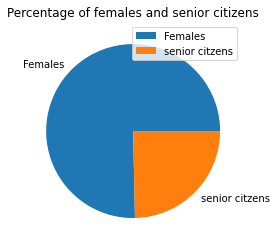

In [ ]:
#plotting pie chart 
plt.pie(y,labels=['Females','senior citzens'])
plt.legend()
plt.title('Percentage of females and senior citizens')
plt.show()

#**Q4.Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.**

In [ ]:
#calculating the mean median mode of the tenure months
print('mean   :',df["Tenure Months"].mean(),'\nmedian :',df["Tenure Months"].median(),'\nmode   :',df["Tenure Months"].mode())

mean   : 32.37114865824223 
median : 29.0 
mode   : 0    1
dtype: int64


plotting the suitable plots to observe more clearly

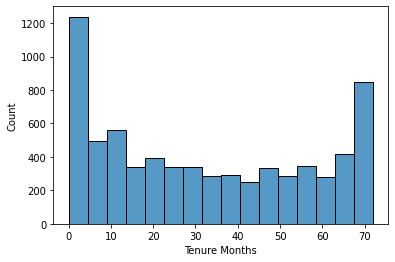

In [ ]:
sb.histplot(x='Tenure Months',data=df)

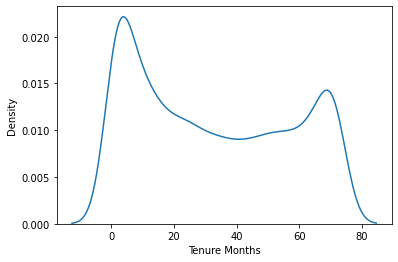

In [ ]:
sb.kdeplot(x='Tenure Months',data=df)

The graph has been showing the two peaks which means it is a bimodal


#**Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.**

In [ ]:
df.replace('Yes',1,inplace=True)
df.replace('No internet service','No',inplace=True)
df.replace('No',0,inplace=True)

In [ ]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103,5036.30,1,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,1,Bank transfer (automatic),21,1419.40,0,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,1,Mailed check,84,1990.50,0,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,1,Credit card (automatic),103,7362.90,0,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,1,Electronic check,29,346.45,0,0,59,2793,NaN


#**Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also.**

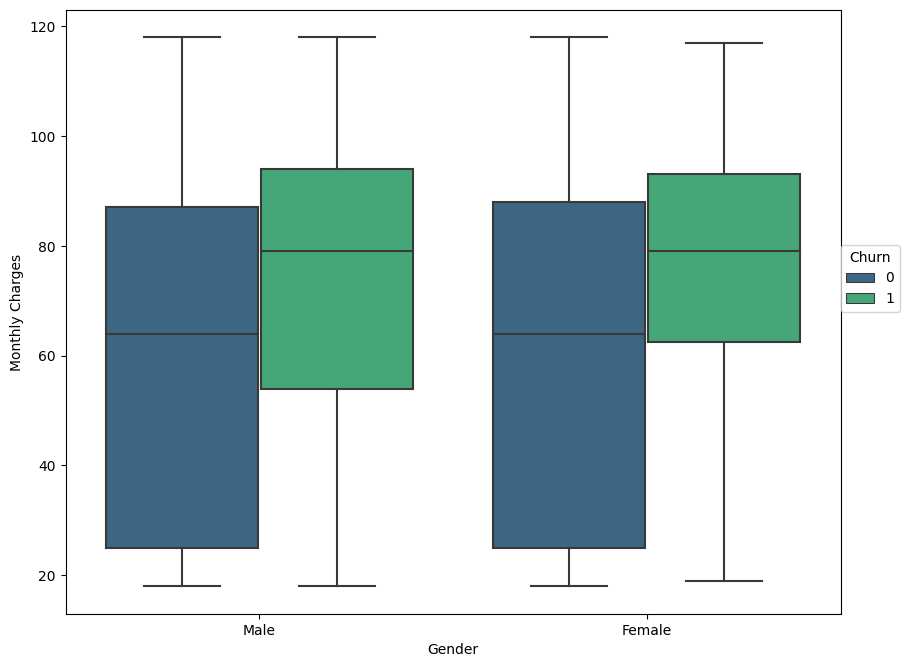

In [ ]:
plt.figure(figsize=(10,8),dpi=100)
sb.boxplot(data=df,x='Gender', y= 'Monthly Charges',hue='Churn Label',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

**The Boxplot shows no outliers for MonthlyCharges and also shows regardless of gender, people who have higher MonthlyCharges tend to churn more with almsot identical representations for both.**

#**Q7. Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.**

In [ ]:
#finding minimum total charges for los angeles city
df.loc[df['Total Charges']==df['Total Charges'].min()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3087,2967-MXRAV,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,One year,0,Mailed check,18,18.8,0,0,51,5160,NaN


In [ ]:
#printing the minimul total charges of the record
min=df.loc[df['Total Charges']==df['Total Charges'].min()]
print(min['Total Charges'])

3087    18.8
Name: Total Charges, dtype: float64


In [ ]:
#finding the maximum total charges for zipcode
z=df.loc[df['Total Charges']==df['Total Charges'].max()]
print(z['Zip Code'],'has the maximum total charges')

1206    95519
Name: Zip Code, dtype: int64 has the maximum total charges


#**Q8. Please find which payment method has the highest churn score and which has the lowest churn score.**

In [ ]:
#getting the types of payment method
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

So we have four payment methods 
1. Mailed check
2. Electronic Check
3. Bank transfer
4. Credit Card 

In [ ]:
#creating the data frames according to the payment methods 
mailed=df.loc[df['Payment Method']=='Mailed check']
electronic=df.loc[df['Payment Method']=='Electronic check']
bank=df.loc[df['Payment Method']=='Bank transfer (automatic)']
credit=df.loc[df['Payment Method']=='Credit card (automatic)']

In [ ]:
#calculating the total churn score values for each payment method
e=electronic['Churn Score'].sum()
m=mailed['Churn Score'].sum()
b=bank['Churn Score'].sum()
c=credit['Churn Score'].sum()

In [ ]:
#creating the dictionarry for payment method and total churn score
pm={'Electronic check':e,'Mailed Check':m,'Bank transfer':b,'Credit card':c}

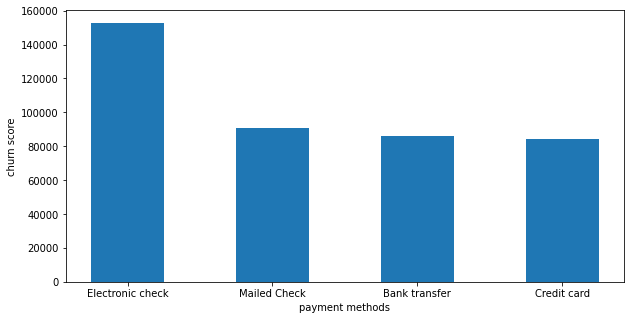

In [ ]:
#creating the bar plot 
payment_methods=list(pm.keys())
churn_score=list(pm.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(payment_methods,churn_score,width = 0.5)
plt.xlabel('payment methods')
plt.ylabel('churn score')
plt.show()

**we can cleary see that *electronic check* has the highest churn score 
where as credit card and bank transfer has similar lowest churn scores**

#**Q9. Please create an appropriate plot to check the count of payment methods and explain it.**

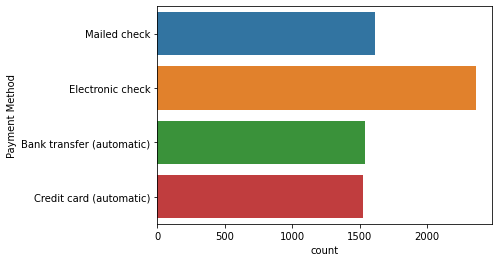

In [ ]:

#creating count plot 
sb.countplot(y='Payment Method',data=df)

It is clearly visible that Electronic check has the highest count and
credit card has lowest count

#**Q10. Please create an appropriate plot to see the relationship between monthly charges and total charges.**

To know the relationship between two variables we use correlation
by plotting scatter plot we can see the visible results from the figure

In [ ]:
#calculating correlation coefficient for both two variables
df['Monthly Charges'].corr(df['Total Charges'])

0.6511258542036095

As the value is '0.6' we can say that there is moderate positive relationship

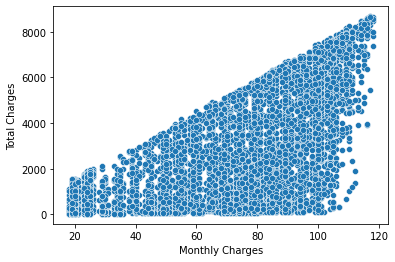

In [ ]:
sb.scatterplot(x='Monthly Charges',y='Total Charges',data=df)

Now we can clearly say that there is moderate relation ship between those to variables